In [1]:
#%pylab
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
import matplotlib.animation as animation
import matplotlib as mpl
# Plot en 3D
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm

# Over Relaxation

##### Se usan las condiciones de frontera que parecen en las notas del curso

In [2]:
#Discretización

Min, Max, N = 0., 40., 51
x = np.linspace(Min,Max,N)
y = x.copy()
h = x[1]-x[0]

In [3]:
#Condiciones de frontera

def h1(y):
    
    return 75.

def h2(y):
    
    return 50.

def h3(x):
    
    return 100.

def h4(x):
    
    return 0.

In [4]:
#Inicializar el campo con condiciones de frontera


def InitT():
    
    T = np.zeros( (N,N) )
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    
    return T

In [5]:
def GetRelaxation(T, Nit=int(1e5), omega = 1.3, tolerancia = 1e-2):
    
    itmax = 0.
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1,len(x)-1): 
            
            for j in range(1,len(y)-1): 
                
                tmp = 0.25*(T[i+1,j]+T[i-1,j]+T[i,j+1]+T[i,j-1])
                
                r = omega*(tmp - T[i,j])
                
                T[i,j] += r
                
                if np.abs(r) > dmax: 
                    
                    dmax = r
                    
        if np.abs(dmax) < tolerancia: 
                    
            itmax = it
            break
                    
    return T, itmax

In [6]:
w = np.linspace(1,1.9,100)
itera = []

for i in w:

    T = InitT()
    Tf1,_ = GetRelaxation(T,omega=i)
    itera.append(_)

  0%|                                      | 62/100000 [00:00<13:06, 127.09it/s]


<IPython.core.display.Javascript object>


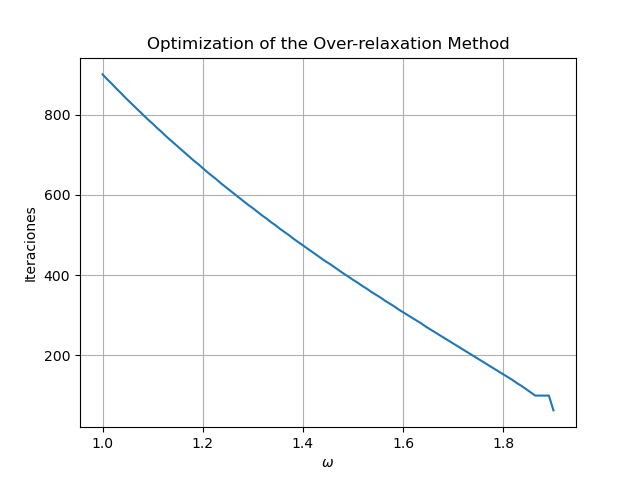

In [7]:
plt.plot(w,itera)
plt.title('Optimization of the Over-relaxation Method')
plt.xlabel(r'$\omega$')
plt.ylabel('Iteraciones')
plt.grid()

## ¿Qué ocurre si $\omega \geq$ 2?

#### Nunca se alcanza la precisión buscada, en otras palabras, no converge.

# 2D Navier-Stokes equations

In [8]:
N = 51

Xmin, Xmax, Npoints_x = 0.,1.,N
Ymin, Ymax, Npoints_y = 0.,1.,N

x = np.linspace(Xmin, Xmax, Npoints_x)
y = np.linspace(Ymin, Ymax, Npoints_y)

deltax = (Xmax-Xmin)/(Npoints_x-1)
deltay = (Ymax-Ymin)/(Npoints_y-1)

# Parámetros

v = 1.
nu = 0.2
omega = 0.5

R = v*deltax/nu

print(deltax, deltay, R, omega)

0.02 0.02 0.09999999999999999 0.5


In [9]:
def h1(y):
    
    return 0.

def h2(y):
    
    return 0.

def h3(x):
    
    return 0.

def h4(x):
    
    return y[-1]*v*h

In [10]:
def InitT():
    
    T = np.zeros( (N,N) )
    
    T[0,:] = h1(y)
    T[-1,:] = h2(y)
    T[:,0] = h3(x)
    T[:,-1] = h4(x)
    return T

In [11]:
def Cond_u():

    for j in range(len(y)):

        u[1,j] = u[0, j]

        u[-1,j] = u[-2,j] 

        u[j, -1] = u[j, -2] + v*h*y[-1]

        u[j, 0] = 0
        
def Cond_v():

    for j in range(len(y)):

        w[0,j] = 0

        w[-1,j] = w[-2,j]

        w[j, -1] = 0

        w[j, 0] = 0

In [12]:
def GetRelaxation(u,w, Nit=int(1e3), omega = 0.7, tolerancia = 1e-2):
    
    itmax = 0.
    
    for it in tqdm(range(Nit)):
        
        if it!=0:
        
            Cond_u()
            Cond_v()

        dmax1 = 0.
        dmax2 = 0.
        
        for i in range(1,len(x)-1): 
            
            for j in range(1,len(y)-1): 
                
                if i >= 5 and i <= 25 and j >= 5 and j <= 30:
                
                    if i==5: 

                        tmp1 = 1/4*( u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] + h**2 * w[i,j])
                        tmp2 = -2/h**2 * ( u[i-1,j] - u[i,j] )

                        r1 = omega*(tmp1 - u[i,j])

                        r2 = omega*(tmp2 - w[i,j])

                        u[i,j] += r1

                        w[i,j] += r2 

                    elif i==25: 

                        tmp1 = 1/4*( u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] + h**2 * w[i,j])
                        tmp2 = -2/h**2 * ( u[i+1,j] - u[i,j] )

                        r1 = omega*(tmp1 - u[i,j])

                        r2 = omega*(tmp2 - w[i,j])

                        u[i,j] += r1

                        w[i,j] += r2 

                    elif j==5: 

                        tmp1 = 1/4*( u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] + h**2 * w[i,j])
                        tmp2 = -2/h**2 * ( u[i,j-1] - u[i,j] )

                        r1 = omega*(tmp1 - u[i,j])

                        r2 = omega*(tmp2 - w[i,j])

                        u[i,j] += r1

                        w[i,j] += r2 
                        
                    elif j==30: 

                        tmp1 = 1/4*( u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] + h**2 * w[i,j])
                        tmp2 = -2/h**2 * ( u[i,j+1] - u[i,j] )

                        r1 = omega*(tmp1 - u[i,j])

                        r2 = omega*(tmp2 - w[i,j])

                        u[i,j] += r1

                        w[i,j] += r2 
                        
                    else: 
                    
                        u[i,j] = 0 
                        w[i,j] = 0 
                
                else:
                
                    tmp1 = 1/4*( u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] + h**2 * w[i,j])

                    tmp2 = 1/4 * ( w[i+1,j] + w[i-1,j] + w[i,j+1] + w[i,j-1] ) \
                    - R/16 * ( ( u[i,j+1] - u[i,j-1] )*( w[i+1,j] - w[i-1,j] ) ) \
                    + R/16 * ( ( u[i+1,j] - u[i-1,j] )*( w[i,j+1] - w[i,j-1] ) )

                    r1 = omega*(tmp1 - u[i,j])

                    r2 = omega*(tmp2 - w[i,j])

                    u[i,j] += r1

                    w[i,j] += r2 

                if np.abs(r1) > dmax1 and np.abs(r2) > dmax2: 
                    
                    dmax1 = r1
                    dmax2 = r2
                    
        if np.abs(dmax1) < tolerancia and np.abs(dmax2) < tolerancia: 
                    
            itmax = it
            break
                    
    return u,w,itmax

In [13]:
u = InitT()
#BoundaryCurrent()
w = InitT()
#BoundaryVorticity()
u,w,_ = GetRelaxation(u,w,omega=omega)

100%|███████████████████████████████████████| 1000/1000 [00:18<00:00, 53.92it/s]


<IPython.core.display.Javascript object>


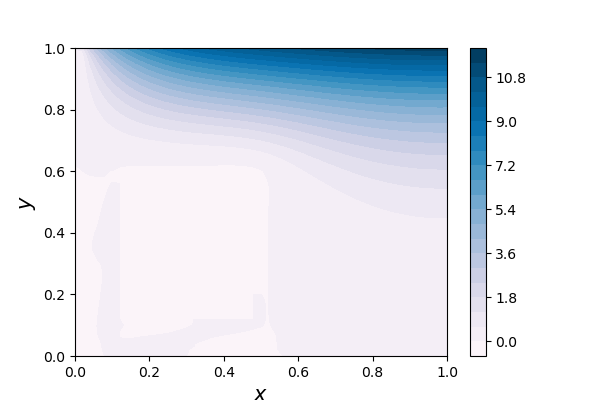

In [14]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
#ax1 = fig.add_subplot(1,2,2, projection = '3d', elev = 25, azim = -50)

X,Y = np.meshgrid(x,y)
c = ax.contourf(X,Y,u.T, 20, cmap='PuBu')
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$y$', fontsize=15)
fig.colorbar(c, ax = ax)

#ax1.set_xlim3d(0, 1)
#ax1.set_ylim3d(0, 1)

#ax1.set_xlabel(r'$x$', fontsize=15)
#ax1.set_ylabel(r'$y$', fontsize=15)
#ax1.set_zlabel(r'$u(x,y)$', fontsize=15)

#ax1.plot_surface(X, Y, u.T, cmap=cm.coolwarm)

<IPython.core.display.Javascript object>


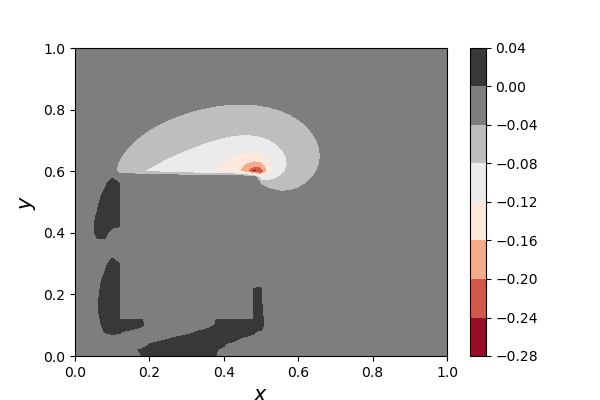

In [15]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
#ax1 = fig.add_subplot(1,2,2, projection = '3d', elev = 25, azim = -50)

X,Y = np.meshgrid(x,y)
c = ax.contourf(X,Y,w.T,cmap='RdGy')
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$y$', fontsize=15)
fig.colorbar(c, ax = ax)

#ax1.set_xlim3d(0, 1)
#ax1.set_ylim3d(0, 1)

#ax1.set_xlabel(r'$x$', fontsize=15)
#ax1.set_ylabel(r'$y$', fontsize=15)
#ax1.set_zlabel(r'$w(x,y)$', fontsize=15)

#ax1.plot_surface(X, Y, w.T, cmap=cm.coolwarm)

<IPython.core.display.Javascript object>


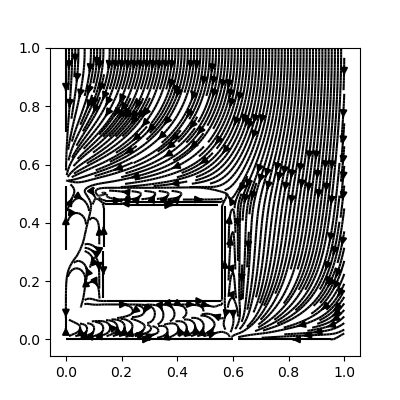

In [16]:
#Calcula campo asociado

s, q = np.gradient(u)     #U es la componente de campo en x, v es la componente del campo en y
s = -s
q = -q

#Grafica campos vectoriales

fig2 = plt.figure(figsize=(4,4))
ax = fig2.add_subplot(1,1,1)
ax.streamplot(x,y,s,q,color='k',density=3)